<a href="https://colab.research.google.com/github/somiltrp/Flood-Prediction-Project/blob/main/Flood_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('kerala.csv')
print(data)

    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9   

       SEP    OCT    NOV   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [ ]:
data.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,YES


In [ ]:
data.isnull().sum()

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [ ]:
print(data.shape)

(118, 16)


In [ ]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [ ]:
data.dtypes

SUBDIVISION          object
YEAR                  int64
JAN                 float64
FEB                 float64
MAR                 float64
APR                 float64
MAY                 float64
JUN                 float64
JUL                 float64
AUG                 float64
SEP                 float64
OCT                 float64
NOV                 float64
DEC                 float64
 ANNUAL RAINFALL    float64
FLOODS               object
dtype: object

In [ ]:
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [ ]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [ ]:
x=data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [ ]:
y=data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
c=data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

NameError: name 'data' is not defined

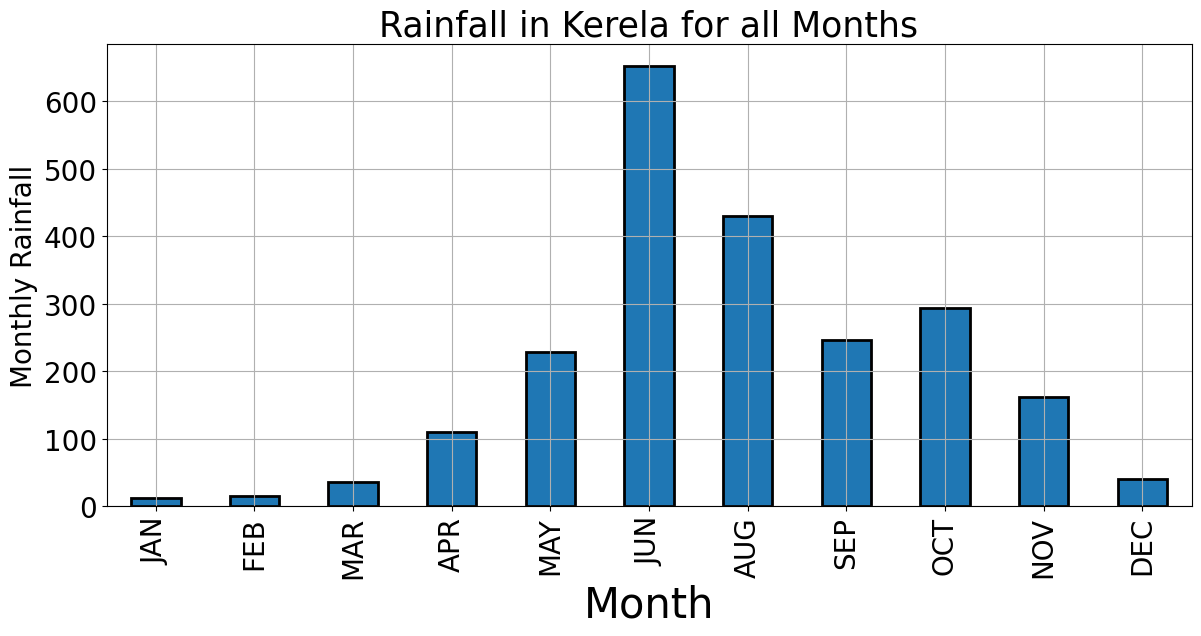

In [ ]:
ax = data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2,figsize=(14,6))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall',fontsize=20)
plt.title('Rainfall in Kerela for all Months',fontsize=25)
ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

In [ ]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [ ]:
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
37,1938,0.3,79.0,53.3,164.5,179.6,681.6,648.6,287.9,223.2,223.7,69.5,22.9
87,1988,0.8,17.5,38.1,177.6,157.2,511.3,502.8,379.8,451.7,68.5,67.0,31.1
38,1939,13.6,3.6,24.9,172.8,105.1,625.8,749.6,459.9,134.1,339.8,298.1,10.2
59,1960,9.4,8.4,44.4,206.6,540.0,480.3,750.9,336.8,371.2,255.9,358.0,23.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4
72,1973,0.0,0.3,12.3,131.5,119.9,617.0,583.5,487.5,61.3,260.8,84.5,53.8
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
117,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1


In [ ]:
x_test

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
42,1943,83.5,14.6,38.4,107.5,478.4,794.5,831.6,183.3,257.6,427.2,223.4,24.3
46,1947,22.2,27.3,98.0,142.2,85.7,556.1,669.3,739.6,394.5,183.7,32.4,47.0
40,1941,15.9,4.6,12.7,101.9,417.5,797.6,517.9,458.5,257.9,221.6,220.5,84.6
26,1927,18.8,35.3,49.6,86.5,265.4,720.2,888.2,315.0,335.6,135.8,137.6,6.8
111,2012,7.4,11.0,21.0,171.1,95.3,430.3,362.6,501.6,241.1,187.5,112.9,9.4
91,1992,2.4,0.9,0.1,43.0,218.4,819.3,767.8,508.0,297.5,290.7,287.6,3.7
94,1995,10.3,6.5,37.3,134.9,355.6,493.4,702.5,457.3,280.0,198.3,182.6,0.1
85,1986,5.6,18.7,11.2,63.1,126.7,597.9,324.8,340.3,235.4,165.5,194.7,9.5
70,1971,31.6,18.5,20.0,113.0,317.5,889.6,648.6,385.2,331.2,220.9,38.3,62.3
89,1990,14.9,4.8,18.0,41.8,488.5,528.6,635.4,370.8,103.3,323.2,158.8,5.2


In [ ]:
y_train=y_train.astype('int')
y_train

3      1
37     0
87     0
38     1
59     1
      ..
114    0
72     0
2      1
117    1
109    1
Name: FLOODS, Length: 94, dtype: int64

In [ ]:
y_test=y_test.astype('int')
y_test

42     1
46     1
40     1
26     1
111    0
91     1
94     0
85     0
70     1
89     0
17     0
66     0
63     0
28     1
52     0
45     1
7      0
12     0
73     0
0      1
1      1
35     1
105    1
23     1
Name: FLOODS, dtype: int64

# **KNN classifier**

In [ ]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predict=clf.predict(x_test)
y_predict

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1])

In [ ]:
print("Values for the Floods:")
print(y_test)

Values for the Floods:
42     1
46     1
40     1
26     1
111    0
91     1
94     0
85     0
70     1
89     0
17     0
66     0
63     0
28     1
52     0
45     1
7      0
12     0
73     0
0      1
1      1
35     1
105    1
23     1
Name: FLOODS, dtype: int64


In [ ]:
print("List of the Predicted Values:")
print(y_predict)

List of the Predicted Values:
[1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1]


In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)
knn_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')

In [ ]:
knn_acc

array([0.78125   , 0.74193548, 0.83870968])

In [ ]:
knn_proba

array([[0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.6, 0.4],
       [0. ,

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_predict)*100))
print("Recall Score:%f"%(recall_score(y_test,y_predict)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_predict)*100))
print(confusion_matrix(y_test,y_predict))


Accuracy Score:91.666667
Recall Score:92.307692
ROC score:91.608392
[[10  1]
 [ 1 12]]


# **Logistic Regression**

In [ ]:
x_train_std=minmax.fit_transform(x_train)
y_train_std=minmax.transform(x_test)
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr_acc

array([0.90625   , 0.80645161, 0.80645161])

In [ ]:
lr_proba

array([[0.3554088 , 0.6445912 ],
       [0.67859433, 0.32140567],
       [0.65169108, 0.34830892],
       [0.42122933, 0.57877067],
       [0.26462028, 0.73537972],
       [0.31024708, 0.68975292],
       [0.60786274, 0.39213726],
       [0.48296416, 0.51703584],
       [0.52819538, 0.47180462],
       [0.39457566, 0.60542434],
       [0.67050599, 0.32949401],
       [0.76703522, 0.23296478],
       [0.62005773, 0.37994227],
       [0.46057936, 0.53942064],
       [0.3189868 , 0.6810132 ],
       [0.54591173, 0.45408827],
       [0.37305411, 0.62694589],
       [0.29544107, 0.70455893],
       [0.43276068, 0.56723932],
       [0.50658068, 0.49341932],
       [0.60691241, 0.39308759],
       [0.37873235, 0.62126765],
       [0.78095853, 0.21904147],
       [0.18155364, 0.81844636],
       [0.66060033, 0.33939967],
       [0.68665332, 0.31334668],
       [0.52550046, 0.47449954],
       [0.76864671, 0.23135329],
       [0.75989154, 0.24010846],
       [0.49775493, 0.50224507],
       [0.

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1])

In [ ]:
print(y_test.values)

[1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1]


In [ ]:
print("List of the Predicted Values:")
print(y_pred)

List of the Predicted Values:
[1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:87.500000
recall score:100.000000
roc score:86.363636
[[ 8  3]
 [ 0 13]]


# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
rmf_clf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')


In [ ]:
rmf_clf_acc

array([0.875     , 0.80645161, 0.80645161])

In [ ]:
rmf_proba

array([[0.33127747, 0.66872253],
       [0.61277011, 0.38722989],
       [0.66900075, 0.33099925],
       [0.27169608, 0.72830392],
       [0.36345945, 0.63654055],
       [0.29743733, 0.70256267],
       [0.58849191, 0.41150809],
       [0.54270577, 0.45729423],
       [0.51082392, 0.48917608],
       [0.58565368, 0.41434632],
       [0.72912631, 0.27087369],
       [0.80642382, 0.19357618],
       [0.53439537, 0.46560463],
       [0.60245202, 0.39754798],
       [0.38251314, 0.61748686],
       [0.362361  , 0.637639  ],
       [0.31406798, 0.68593202],
       [0.36103097, 0.63896903],
       [0.39070605, 0.60929395],
       [0.50436818, 0.49563182],
       [0.70749811, 0.29250189],
       [0.33542623, 0.66457377],
       [0.76664826, 0.23335174],
       [0.27096749, 0.72903251],
       [0.52538624, 0.47461376],
       [0.74565787, 0.25434213],
       [0.35845461, 0.64154539],
       [0.69756975, 0.30243025],
       [0.82628808, 0.17371192],
       [0.49698509, 0.50301491],
       [0.

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:87.500000
recall score:100.000000
roc score:86.363636
[[ 8  3]
 [ 0 13]]


# **Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.65625   , 0.80645161, 0.80645161])

In [ ]:
print("Predicted Values:")
y_pred=dtc_clf.predict(x_test)
y_pred

Predicted Values:


array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1])

In [ ]:
print("Actual Values:")
print(y_test.values)

Actual Values:
[1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:75.000000
recall score:84.615385
roc score:74.125874
[[ 7  4]
 [ 2 11]]


# **Support Vector Classification**

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
svc_acc=cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method='predict_proba')

In [ ]:
svc_acc

array([0.96875   , 0.83870968, 0.90322581])

In [ ]:
svc_proba

array([[5.51657456e-02, 9.44834254e-01],
       [7.52530387e-01, 2.47469613e-01],
       [7.25580378e-01, 2.74419622e-01],
       [2.83438146e-01, 7.16561854e-01],
       [1.19254528e-01, 8.80745472e-01],
       [4.32526240e-02, 9.56747376e-01],
       [5.89001414e-01, 4.10998586e-01],
       [3.99636631e-01, 6.00363369e-01],
       [5.46350840e-01, 4.53649160e-01],
       [2.80928934e-01, 7.19071066e-01],
       [9.49920699e-01, 5.00793006e-02],
       [9.84811185e-01, 1.51888150e-02],
       [5.24675793e-01, 4.75324207e-01],
       [3.11744788e-01, 6.88255212e-01],
       [1.19783750e-01, 8.80216250e-01],
       [3.47569231e-01, 6.52430769e-01],
       [1.39796101e-01, 8.60203899e-01],
       [4.21952874e-02, 9.57804713e-01],
       [2.87245024e-01, 7.12754976e-01],
       [6.16591684e-01, 3.83408316e-01],
       [8.06539436e-01, 1.93460564e-01],
       [9.57088689e-02, 9.04291131e-01],
       [6.58325669e-01, 3.41674331e-01],
       [1.54034829e-02, 9.84596517e-01],
       [9.298040

In [ ]:
svc_scores=svc_proba[:,1]
svc_scores

array([0.94483425, 0.24746961, 0.27441962, 0.71656185, 0.88074547,
       0.95674738, 0.41099859, 0.60036337, 0.45364916, 0.71907107,
       0.0500793 , 0.01518881, 0.47532421, 0.68825521, 0.88021625,
       0.65243077, 0.8602039 , 0.95780471, 0.71275498, 0.38340832,
       0.19346056, 0.90429113, 0.34167433, 0.98459652, 0.07019599,
       0.1525667 , 0.57176415, 0.13787334, 0.11232768, 0.82274282,
       0.91526252, 0.98385863, 0.18484607, 0.05978356, 0.10904447,
       0.00379914, 0.18515592, 0.61224583, 0.01533233, 0.99499948,
       0.82368014, 0.95419539, 0.45378255, 0.45094324, 0.91282756,
       0.27684921, 0.95129471, 0.11490983, 0.26938625, 0.06453966,
       0.97625721, 0.3812451 , 0.96552216, 0.12456002, 0.99999899,
       0.59987463, 0.00200758, 0.89571196, 0.01720166, 0.99370427,
       0.08306561, 0.54847836, 0.51732655, 0.64012145, 0.73813801,
       0.26743646, 0.6786082 , 0.74291125, 0.57016602, 0.52780141,
       0.08000798, 0.74761729, 0.60102696, 0.8744013 , 0.07811

In [ ]:
y_pred=svc_classifier.predict(x_test)
print("Actual Flood Values:")
print(y_test.values)

Actual Flood Values:
[1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1]


In [ ]:
print("Predicted Flood Values:")
print(y_pred)

Predicted Flood Values:
[1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:87.500000
recall score:100.000000
roc score:86.363636
[[ 8  3]
 [ 0 13]]


# **Comparing all the prediction models**

In [ ]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVC', SVC()))



names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
tr_split

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Name,Score
0,KNN,0.916667
1,LR,0.875000
2,RF,0.875000
3,DT,0.750000
4,SVC,0.875000


<ipython-input-143-55355fc1076e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split, palette={'orange', 'Blue', 'Green', 'Red', 'Yellow'})


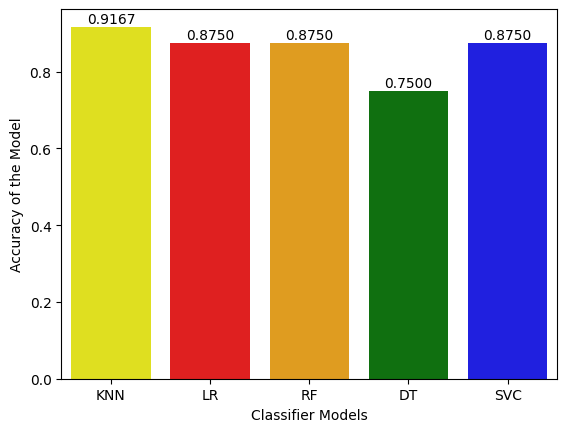

In [ ]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split, palette={'orange', 'Blue', 'Green', 'Red', 'Yellow'})
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center")

plt.show()

In [ ]:
tr_split['Score'].max()

0.9166666666666666

# **End Of The Code**